In [ ]:
import pandas as pd #pandas is a data manipulation library
import numpy as np #numpy is a data manipulation library
import matplotlib.pyplot as plt #matplotlib is a data visualization library
import seaborn as sns #seaborn is a data visualization library


In [ ]:
dataframe = pd.read_csv('D:\Projects\Project Zomato Data Analysis\Zomato data .csv') #read the csv file and store it in a dataframe
print(dataframe.head()) #prints the first 5 rows of the dataframe

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataframe #prints the dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
def HandleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
dataframe['rate']=dataframe['rate'].apply(HandleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
# Summary of the data frame

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
# Conclusion - There are 51 columns and 51717 rows in the data frame and there are no null values in the data frame

<Axes: xlabel='listed_in(type)', ylabel='count'>

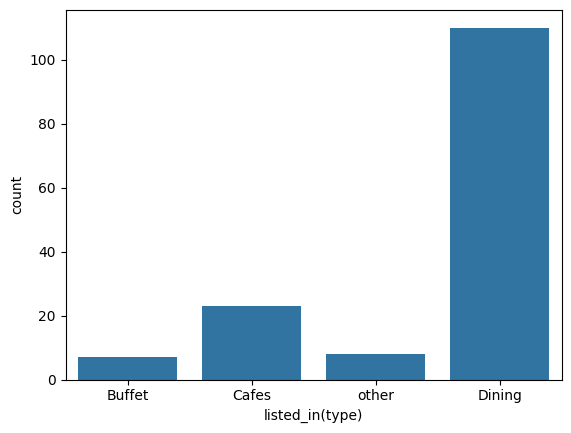

In [14]:
sns.countplot(x=dataframe['listed_in(type)'])

In [ ]:
# Conclusion - The most popular type of restaurant is Dinning

Text(0, 0.5, 'Number of Votes')

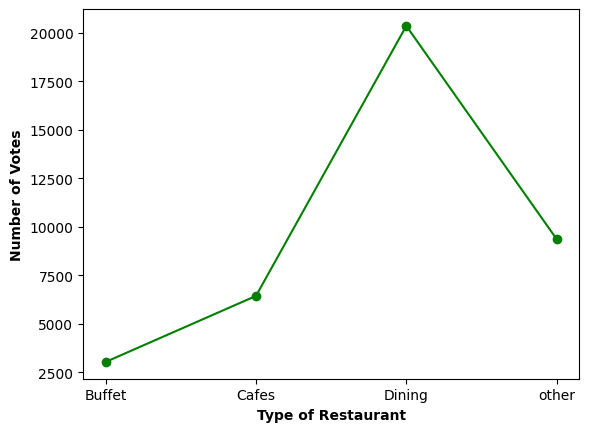

In [27]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result =pd.DataFrame ({'votes' : grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of Restaurant', c='black', size=10, weight='bold')
plt.ylabel('Number of Votes', c='black', size=10, weight='bold')

In [ ]:
# Conclusion - The majority of votes are for the type of restaurant Dinning

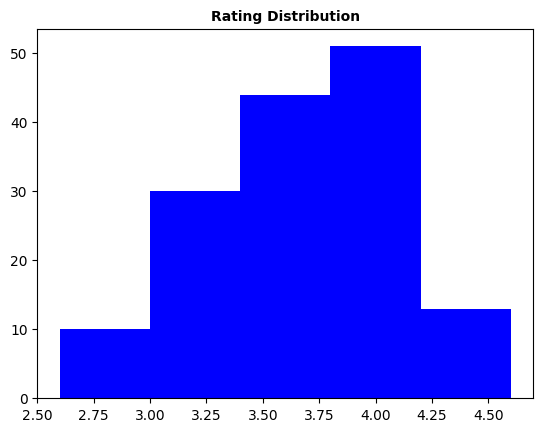

In [31]:
plt.hist(dataframe['rate'], bins=5, color='blue')
plt.title('Rating Distribution', c='black', size=10, weight='bold')
plt.show()

In [ ]:
# Conclusion - The majority of the ratings are between 3.5 and 4.5.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

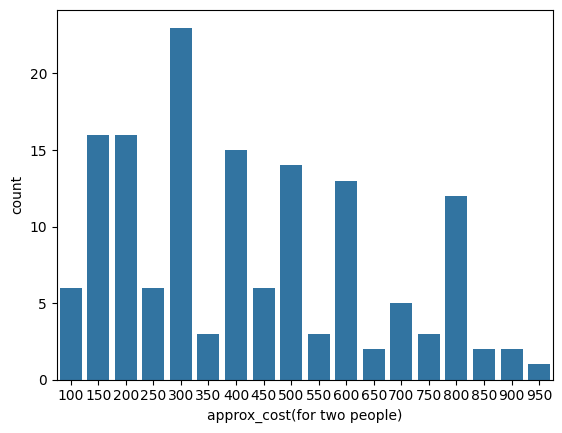

In [33]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [ ]:
# Conclusion - The majority of the restaurants have an approximate cost for two people between 300 and 400.

<Axes: xlabel='online_order', ylabel='rate'>

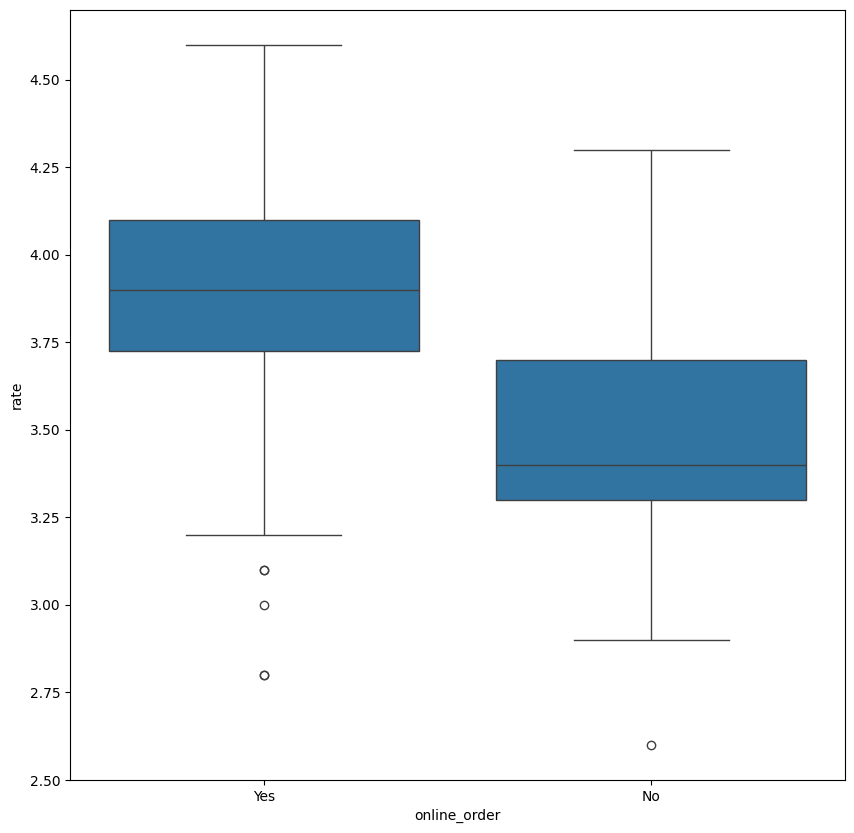

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(x='online_order', y='rate', data=dataframe)

In [ ]:
# Conslusion - The ratings of the restaurants that accept online orders are higher than the ratings of the restaurants that do not accept online orders.

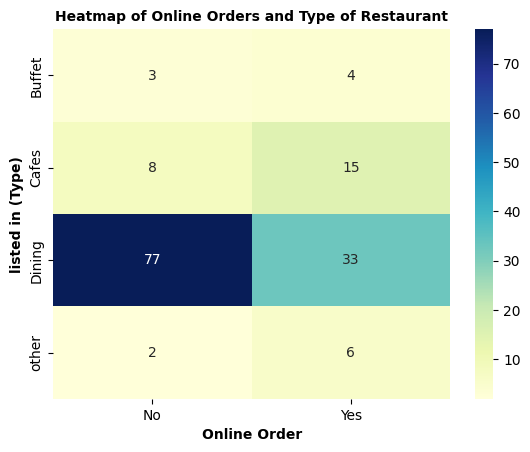

In [37]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Online Orders and Type of Restaurant', c='black', size=10, weight='bold')
plt.xlabel('Online Order', c='black', size=10, weight='bold')
plt.ylabel('listed in (Type)', c='black', size=10, weight='bold')
plt.show()

In [ ]:
# Conclusion - The majority of the restaurants that accept online orders are of the type of restaurant Dinning.